In [1]:
import numpy as np
from numpy import polyfit
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import h5py
import numpy as np
from matplotlib.pyplot import figure,show
from swiftsimio import load
import pandas as pd
from scipy.stats import norm
import matplotlib.mlab as mlab
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root, minimize
from scipy.integrate import fixed_quad, quad, dblquad
from scipy.stats import moment
from scipy.stats import norm, kurtosis, skew



In [ ]:
# Define radial bins
radial_bins = np.logspace(0.5, 2.7, 30).astype(np.float32)

with h5py.File("velocity_data_M14_14_5_trial_NORMAL_SIGMA_largersecondary_newquantity_lowsigma8.h5", "r") as f:
    radial_distances = f["radial_distances"][:]
    velocities = f["velocity_differences"][:]
    
# np.max(radial_distances)
bin_indices = np.digitize(radial_distances, bins=radial_bins) - 1
num_bins = len(radial_bins) - 1  


num_cols = 3
num_rows = int(np.ceil(num_bins / num_cols))  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))
axes = axes.flatten()  


for bin_idx in range(num_bins):
    bin_mask = bin_indices == bin_idx
    bin_velocities = velocities[bin_mask]
    
    if len(bin_velocities) == 0:
        continue
    
    ax = axes[bin_idx]
    ax.hist(bin_velocities, bins=50, alpha=0.75, color='b', edgecolor='black')
    ax.set_xlabel("Velocity Difference ")
    ax.set_ylabel("Count")
    ax.set_title(f"Bin {bin_idx + 1}: {radial_bins[bin_idx]:.2f} - {radial_bins[bin_idx + 1]:.2f} Mpc")


for i in range(num_bins, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from scipy.stats import norm, kurtosis, skew


radial_bins = np.linspace(4,500, 20).astype(np.float32)

with h5py.File("velocity_data_M14_14_5_trial_NORMAL_SIGMA_largersecondary_newquantity.h5", "r") as f:
    radial_distances = f["radial_distances"][:]
    velocities = f["velocity_differences"][:]

# Bin indices
bin_indices = np.digitize(radial_distances, bins=radial_bins) - 1
num_bins = len(radial_bins) - 1


means = []
variances = []
skewnesses = []
kurtoses = []
radial_bin_centers = []

# Loop through bins and plot histograms
for bin_idx in range(num_bins):
    bin_mask = bin_indices == bin_idx
    bin_velocities = velocities[bin_mask]

    if len(bin_velocities) == 0:
        means.append(np.nan)
        variances.append(np.nan)
        skewnesses.append(np.nan)
        kurtoses.append(np.nan)
        continue

    # Compute moments
    means.append(np.mean(bin_velocities))
    variances.append(np.var(bin_velocities))
    skewnesses.append(skew(bin_velocities))
    kurtoses.append(kurtosis(bin_velocities,fisher=False))

    radial_bin_centers.append((radial_bins[bin_idx] + radial_bins[bin_idx + 1]) / 2)


    # compute center
    r0, r1 = radial_bins[bin_idx], radial_bins[bin_idx + 1]

    if len(bin_velocities) == 0:
        continue  # skip empty bins

    # count galaxies
    N = len(bin_velocities)
    N_str = f"$N = {N:.2g}$"

    plt.figure(figsize=(8, 6))
    _, bins, _ = plt.hist(
        bin_velocities,
        bins=50,
        alpha=0.75,
        color='blue',
        edgecolor='black'
    )

    plt.text(
        0.95, 0.95, N_str,
        transform=plt.gca().transAxes,
        ha='right', va='top',
        fontsize=16,
        fontweight='bold'
    )
    ax = plt.gca()
    ax.yaxis.get_offset_text().set_fontsize(14)

    plt.xlabel(r"Velocity difference $v$", fontsize=14)
    plt.ylabel(r"Number of galaxies per $v$", fontsize=14)
    plt.tick_params(axis='both', which='major',length=6, width=2,labelsize=14)
    plt.tick_params(axis='both', which='minor', length=6, width=2,labelsize=14)

    plt.tight_layout()

    # save histograms
    fname = f"hist_M14_14_5_normalsigma_{r0:.1f}_to_{r1:.1f}Mpc.pdf"
    print(fname)
    plt.savefig(fname, dpi=400)
    plt.close()


hist_M14_14_5_normalsigma_4.0_to_30.1Mpc.pdf
hist_M14_14_5_normalsigma_30.1_to_56.2Mpc.pdf
hist_M14_14_5_normalsigma_56.2_to_82.3Mpc.pdf
hist_M14_14_5_normalsigma_82.3_to_108.4Mpc.pdf
hist_M14_14_5_normalsigma_108.4_to_134.5Mpc.pdf
hist_M14_14_5_normalsigma_134.5_to_160.6Mpc.pdf
hist_M14_14_5_normalsigma_160.6_to_186.7Mpc.pdf
hist_M14_14_5_normalsigma_186.7_to_212.8Mpc.pdf
hist_M14_14_5_normalsigma_212.8_to_238.9Mpc.pdf
hist_M14_14_5_normalsigma_238.9_to_265.1Mpc.pdf
hist_M14_14_5_normalsigma_265.1_to_291.2Mpc.pdf
hist_M14_14_5_normalsigma_291.2_to_317.3Mpc.pdf
hist_M14_14_5_normalsigma_317.3_to_343.4Mpc.pdf
hist_M14_14_5_normalsigma_343.4_to_369.5Mpc.pdf
hist_M14_14_5_normalsigma_369.5_to_395.6Mpc.pdf
hist_M14_14_5_normalsigma_395.6_to_421.7Mpc.pdf
hist_M14_14_5_normalsigma_421.7_to_447.8Mpc.pdf
hist_M14_14_5_normalsigma_447.8_to_473.9Mpc.pdf
hist_M14_14_5_normalsigma_473.9_to_500.0Mpc.pdf


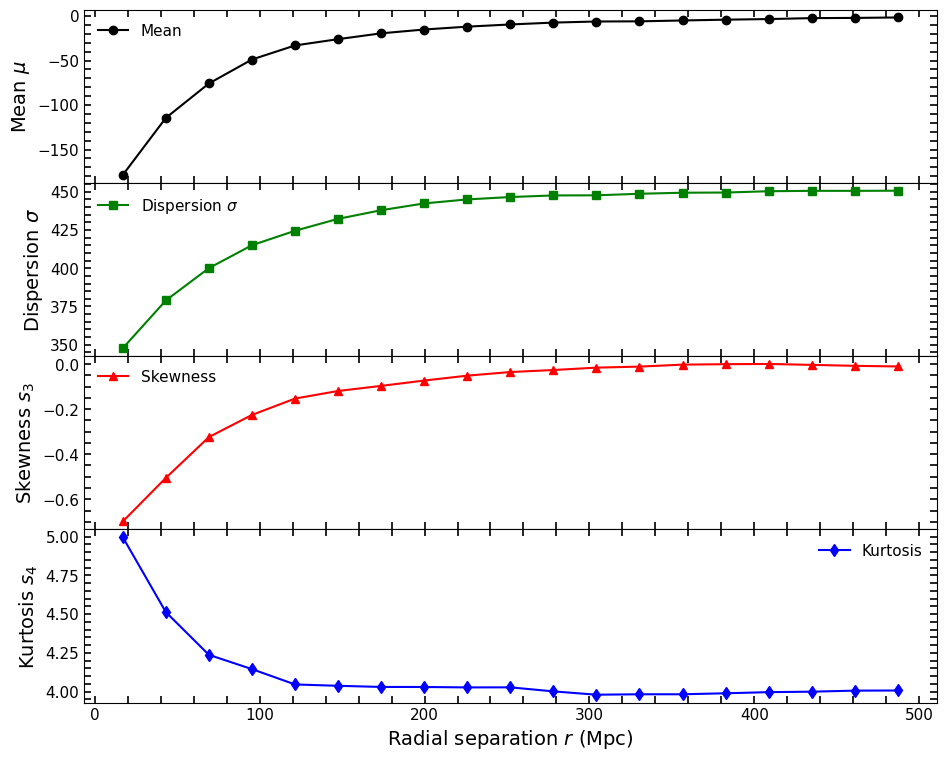

In [43]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

fig = plt.figure(figsize=(11, 9))
gs = gridspec.GridSpec(4, 1, height_ratios=[1, 1, 1, 1], hspace=0.0)

axs = [fig.add_subplot(gs[i]) for i in range(4)]

for ax in axs:
    ax.spines['top'].set_visible(True)
    ax.spines['right'].set_visible(True)

    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True,
                   labelsize=11, length=5, width=1.2)

    ax.minorticks_on()


axs[0].plot(radial_bin_centers, means, marker='o', color='black', label='Mean')
axs[0].set_ylabel(r"Mean $\mu$ ", fontsize=14)
axs[0].legend(fontsize=11, frameon=False)


axs[1].plot(radial_bin_centers, np.sqrt(variances), marker='s', color='green', label=r'Dispersion $\sigma$')
axs[1].set_ylabel(r"Dispersion $\sigma$", fontsize=14)
axs[1].legend(fontsize=11, frameon=False)


axs[2].plot(radial_bin_centers, skewnesses, marker='^', color='red', label='Skewness')
axs[2].set_ylabel(r"Skewness $s_3$", fontsize=14)
axs[2].legend(fontsize=11, frameon=False)


axs[3].plot(radial_bin_centers, kurtoses, marker='d', color='blue', label='Kurtosis')
axs[3].set_ylabel(r"Kurtosis $s_4$", fontsize=14)
axs[3].set_xlabel(r"Radial separation $r$ (Mpc)", fontsize=14)
axs[3].legend(fontsize=11, frameon=False)
plt.savefig('moments_plot_M14_2_halo.pdf', format='pdf', bbox_inches='tight', dpi=600)
plt.show()
